##Popularity Prediction
Objective: Predict track popularity scores.
Results: High accuracy in predicting  using features like danceability,
energy, loudness, etc. Evaluation metrics (R-squared, MAE, MSE) should
reflect strong performance.

In [ ]:
import pandas as pd

# If saved as pickle in Drive
df = pd.read_pickle('/content/drive/MyDrive/Audio_Genre_ML/cleaned_spotify_data.pkl')


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(113999, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   explicit          113999 non-null  bool   
 3   danceability      113999 non-null  float64
 4   energy            113999 non-null  float64
 5   key               113999 non-null  int64  
 6   loudness          113999 non-null  float64
 7   mode              113999 non-null  int64  
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  object 
dtypes: bool(1), float64(9), i

##  Correlation Matrix

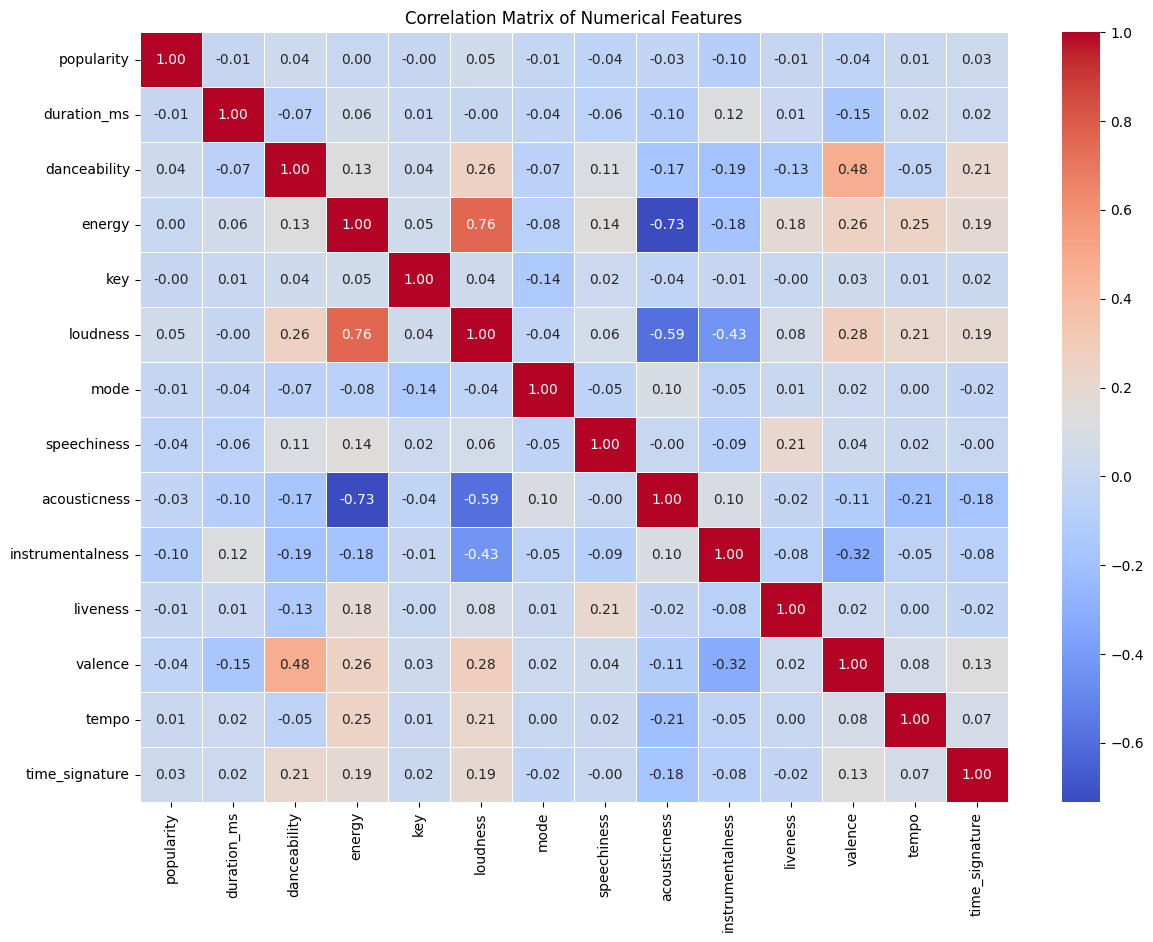

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Correlation with Target (popularity)

In [ ]:
# Correlation with popularity
pop_corr = df.select_dtypes(include='number').corr()['popularity'].sort_values(ascending=False)
print(pop_corr)


popularity          1.000000
loudness            0.050420
danceability        0.035444
time_signature      0.031076
tempo               0.013212
energy              0.001053
key                -0.003847
liveness           -0.005397
duration_ms        -0.007129
mode               -0.013948
acousticness       -0.025458
valence            -0.040522
speechiness        -0.044930
instrumentalness   -0.095147
Name: popularity, dtype: float64


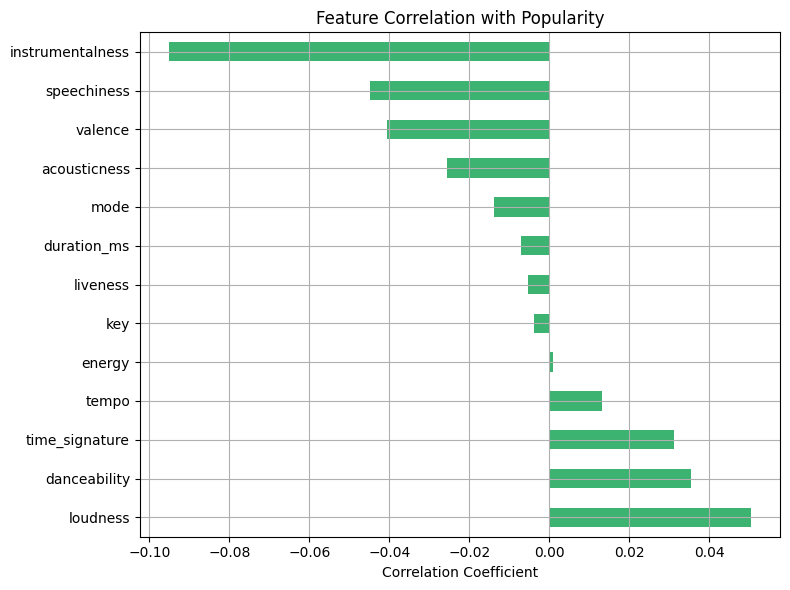

In [ ]:
pop_corr.drop('popularity').plot(kind='barh', figsize=(8,6), color='mediumseagreen')
plt.title('Feature Correlation with Popularity')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()


All correlations are weak (< |0.1|)

None of the features have a strong linear relationship with popularity.

In [ ]:
import numpy as np

df['popularity_log'] = np.log1p(df['popularity'])  # log1p handles 0s safely

## Define Features and Target

In [ ]:
X = df.drop(columns=['popularity', 'track_genre','popularity_log'])  # Drop target and genre
y = df['popularity']


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


##  Feature Scaling (Important for Linear Regression)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Regression Models

###  Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)



# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"🔹 {model_name} Results")
    print("R² Score:", round(r2_score(y_true, y_pred), 4))
    print("MAE     :", round(mean_absolute_error(y_true, y_pred), 4))
    print("MSE     :", round(mean_squared_error(y_true, y_pred), 4))
    print("-" * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")



🔹 Linear Regression Results
R² Score: 0.0231
MAE     : 18.3731
MSE     : 484.473
------------------------------


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

## Linear Regression Pipeline with log(popularity) and Reverse Transformation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import numpy as np

df['popularity_log'] = np.log1p(df['popularity'])  # log1p handles 0s safely


In [ ]:
df.shape

(113999, 17)

In [ ]:
# Step 1: Feature matrix and log-transformed target
X = df.drop(columns=['popularity', 'track_genre',"popularity_log"])
y = df['popularity_log']  # log popularity as target variable


In [ ]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Step 3: Feature Scaling (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 4: Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Step 5: Predict on Test Set (log scale)
y_pred_log = model.predict(X_test_scaled)

In [ ]:
# Step 6: Reverse log1p transformation to get back to original popularity scale
y_pred_actual = np.expm1(y_pred_log)     # predicted values
y_test_actual = np.expm1(y_test)         # true values

In [ ]:
# Step 7: Evaluate the model
print("📊 Evaluation on Actual Popularity Scale (after inverse transformation)")
print("R² Score :", round(r2_score(y_test_actual, y_pred_actual), 4))
print("MAE      :", round(mean_absolute_error(y_test_actual, y_pred_actual), 4))
print("MSE      :", round(mean_squared_error(y_test_actual, y_pred_actual), 4))

📊 Evaluation on Actual Popularity Scale (after inverse transformation)
R² Score : -0.3757
MAE      : 21.6495
MSE      : 682.2865


Linear Regression with log-transformed popularity is not fitting well.

In fact, it's doing worse than just predicting the mean of the target variable.

This indicates:

Linear relationships between features and target are very weak or nonexistent

Outliers or noise might still be affecting model performance

The relationship might be nonlinear, requiring a better model type

## Random Forest (Raw Popularity)

In [ ]:
# Features and raw target
X = df.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df['popularity']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Features and raw target
X = df.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

print("📊 Random Forest Results (Raw Popularity)")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Random Forest Results (Raw Popularity)
R² Score : 0.5272
MAE      : 10.966
MSE      : 234.4997


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf, '/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_model.pkl')


['/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_model.pkl']

In [ ]:
# Optional: Save scaler too if you plan to use it for other models
joblib.dump(scaler, '/content/drive/MyDrive/Audio_Genre_ML/scaler.pkl')

['/content/drive/MyDrive/Audio_Genre_ML/scaler.pkl']

### Load

In [ ]:
# Load model
rf_model = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_model.pkl')



In [ ]:
import joblib

# Load the scaler from the saved file
scaler = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/scaler.pkl')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


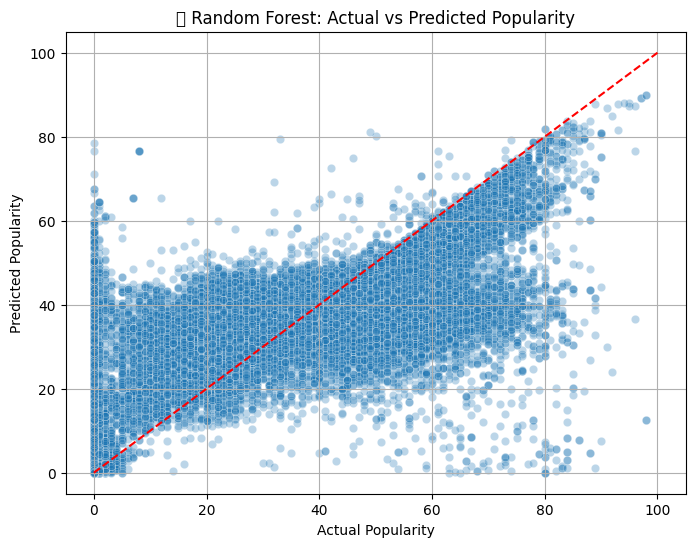

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("🎯 Random Forest: Actual vs Predicted Popularity")
plt.grid(True)
plt.show()


## Key Observations
Strong Overall Correlation: The model shows a clear positive relationship between actual and predicted values, suggesting the Random Forest is capturing the underlying patterns reasonably well.
Better Performance at Higher Values: The predictions appear more accurate for higher popularity values (80-100 range), where points cluster more tightly around the diagonal line.
More Scatter at Lower Values: For lower actual popularity values (0-40), there's considerably more spread in the predictions, indicating higher uncertainty in this range.
Potential Ceiling Effect: The model seems to have difficulty predicting very low popularity values, with many predictions clustering above the diagonal line in the lower ranges.
Dense Data Distribution: The concentration of points suggests your dataset has more samples in the middle-to-high popularity ranges.

/tmp/ipython-input-21-3889474407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


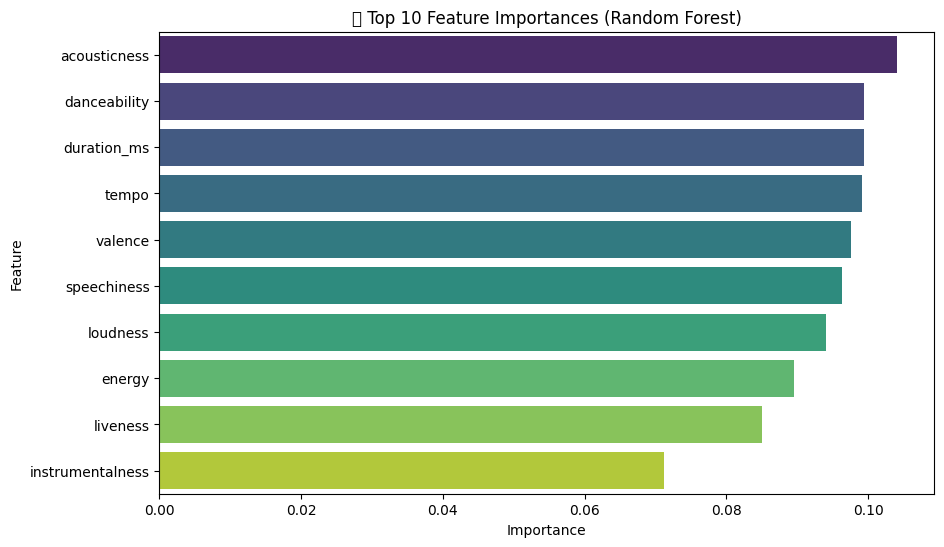

In [ ]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title("🔍 Top 10 Feature Importances (Random Forest)")
plt.show()


## XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# Use the same feature and target setup as Random Forest
X = df.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

print("📊 XGBoost Regressor Results")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 XGBoost Regressor Results
R² Score : 0.183
MAE      : 16.3897
MSE      : 405.1947


## Scale the Features (Try and Compare)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)


In [ ]:
print("📊 XGBoost Regressor Scaled Results")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))

📊 XGBoost Regressor Scaled Results
R² Score : 0.181
MAE      : 16.4103
MSE      : 406.1686


## Tune Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 18 candidates, totalling 54 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


## Final Evaluation of Tuned XGBoost

In [ ]:
# Predict on test data
y_pred = best_model.predict(X_test)  # Or X_test_scaled if you're using scaled features

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("📊 Tuned XGBoost Evaluation")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Tuned XGBoost Evaluation
R² Score : 0.2873
MAE      : 15.0609
MSE      : 353.4438


## Dump

In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/Audio_Genre_ML/xgb_tuned_model.pkl')


['/content/drive/MyDrive/Audio_Genre_ML/xgb_tuned_model.pkl']

## Load

In [ ]:
xgb_model = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/xgb_tuned_model.pkl')


## Voting Regressor Pipeline

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
X = df.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
lr = LinearRegression()

rf = RandomForestRegressor(n_estimators=100, random_state=42)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    objective='reg:squarederror',
    random_state=42
)


In [ ]:
voting_reg = VotingRegressor(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('xgb', xgb_model)
])


In [ ]:
voting_reg.fit(X_train, y_train)

y_pred = voting_reg.predict(X_test)

# Evaluation
print("📊 Voting Regressor Evaluation")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Voting Regressor Evaluation
R² Score : 0.3701
MAE      : 14.5498
MSE      : 312.407


In [ ]:
import joblib
joblib.dump(voting_reg, '/content/drive/MyDrive/Audio_Genre_ML/voting_regressor_model.pkl')



['/content/drive/MyDrive/Audio_Genre_ML/voting_regressor_model.pkl']

## Load later with evaluation metrics

In [ ]:
voting_reg = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/voting_regressor_model.pkl')


## Feature Engineering

In [ ]:
df_fe = df.copy()


In [ ]:
df_fe.shape

(113999, 17)

In [ ]:
df_fe['duration_min'] = df_fe['duration_ms'] / 60000


### Tempo Bins (Slow, Medium, Fast, Very Fast)

In [ ]:
df_fe['tempo_bin'] = pd.cut(
    df_fe['tempo'],
    bins=[0, 90, 120, 150, 1000],
    labels=['slow', 'medium', 'fast', 'very fast']
)


### Log Transform Skewed Features

In [ ]:
import numpy as np

df_fe['log_acousticness'] = np.log1p(df_fe['acousticness'])
df_fe['log_duration'] = np.log1p(df_fe['duration_ms'])
df_fe['log_loudness'] = np.log1p(df_fe['loudness'] + 60)  # shift to make values positive

### Interaction Features

In [ ]:
df_fe['dance_valence'] = df_fe['danceability'] * df_fe['valence']
df_fe['energy_dance'] = df_fe['energy'] * df_fe['danceability']
df_fe['energy_speech'] = df_fe['energy'] * df_fe['speechiness']


### Convert Categorical to Numeric (if any)

In [ ]:
# Convert tempo_bin to numeric encoding
df_fe['tempo_bin_encoded'] = df_fe['tempo_bin'].map({
    'slow': 0,
    'medium': 1,
    'fast': 2,
    'very fast': 3
})


In [ ]:
drop_cols = ['explicit',
             'duration_ms', 'tempo', 'tempo_bin']  # optionally drop
df_fe = df_fe.drop(columns=drop_cols)


In [ ]:
# Assuming you're still predicting 'popularity'
X = df_fe.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df_fe['popularity']


In [ ]:
df_fe.shape

(113999, 22)

## Random Forest with feature engineered data set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Features and raw target
X = df_fe.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df_fe['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

print("📊 Random Forest Results (Raw Popularity)")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))

📊 Random Forest Results (Raw Popularity)
R² Score : 0.5214
MAE      : 11.0185
MSE      : 237.3748


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, '/content/drive/MyDrive/Audio_Genre_ML/rf_df_fe_model.pkl')


['/content/drive/MyDrive/Audio_Genre_ML/rf_df_fe_model.pkl']

In [ ]:
# Save feature-engineered DataFrame as pickle
df_fe.to_pickle('/content/drive/MyDrive/Audio_Genre_ML/df_fe.pkl')


### Reload

In [ ]:
import joblib

# Load model
rf = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/rf_df_fe_model.pkl')


In [ ]:
# Load df_fe
import pandas as pd
df_fe = pd.read_pickle('/content/drive/MyDrive/Audio_Genre_ML/df_fe.pkl')

## Gradient Boosting (Sklearn)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare X and y
X = df_fe.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df_fe['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.impute import SimpleImputer

# Apply imputer
imputer = SimpleImputer(strategy='mean')  # or 'median'

# Apply only to numeric columns (assuming X is already defined)
X_imputed = imputer.fit_transform(X)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbr', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

gbr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('gbr',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=300,
                                           random_state=42))])

In [ ]:
y_pred = gbr_pipeline.predict(X_test)

print("📊 Gradient Boosting Results")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Gradient Boosting Results
R² Score : 0.1604
MAE      : 16.6405
MSE      : 416.3747


In [ ]:
import joblib
joblib.dump(gbr_pipeline, '/content/drive/MyDrive/Audio_Genre_ML/gbr_model.pkl')


['/content/drive/MyDrive/Audio_Genre_ML/gbr_model.pkl']

In [ ]:
gbr_pipeline = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/gbr_model.pkl')

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)


HistGradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)

print("📊 HistGradient Boosting Results")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))

📊 HistGradient Boosting Results
R² Score : 0.1717
MAE      : 16.5149
MSE      : 410.7896


## Gradient Boosting model with log popularity as target

In [ ]:
X = df_fe.drop(columns=['popularity', 'track_genre', 'popularity_log'])
y = df_fe['popularity_log']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.impute import SimpleImputer

# Apply imputer
imputer = SimpleImputer(strategy='mean')  # or 'median'

# Apply only to numeric columns (assuming X is already defined)
X_imputed = imputer.fit_transform(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

gbr_pipeline_log = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbr', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

gbr_pipeline_log.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('gbr',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=300,
                                           random_state=42))])

In [ ]:
import numpy as np
# Predict log-scale
y_pred_log = gbr_pipeline_log.predict(X_test)

# Convert back to original scale
y_pred_actual = np.expm1(y_pred_log)

# Also convert actual y_test back to real popularity
y_test_actual = np.expm1(y_test)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("📊 Gradient Boosting with log(popularity) ➜ Reversed to Actual")
print("R² Score :", round(r2_score(y_test_actual, y_pred_actual), 4))
print("MAE      :", round(mean_absolute_error(y_test_actual, y_pred_actual), 4))
print("MSE      :", round(mean_squared_error(y_test_actual, y_pred_actual), 4))


📊 Gradient Boosting with log(popularity) ➜ Reversed to Actual
R² Score : -0.1815
MAE      : 19.1293
MSE      : 585.9659


## Permutation Importance (Model-Agnostic)

In [ ]:
from sklearn.inspection import permutation_importance

# Run permutation importance on test set
result = permutation_importance(
    rf, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=1
)

In [ ]:
# Create a sorted list of feature importances
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

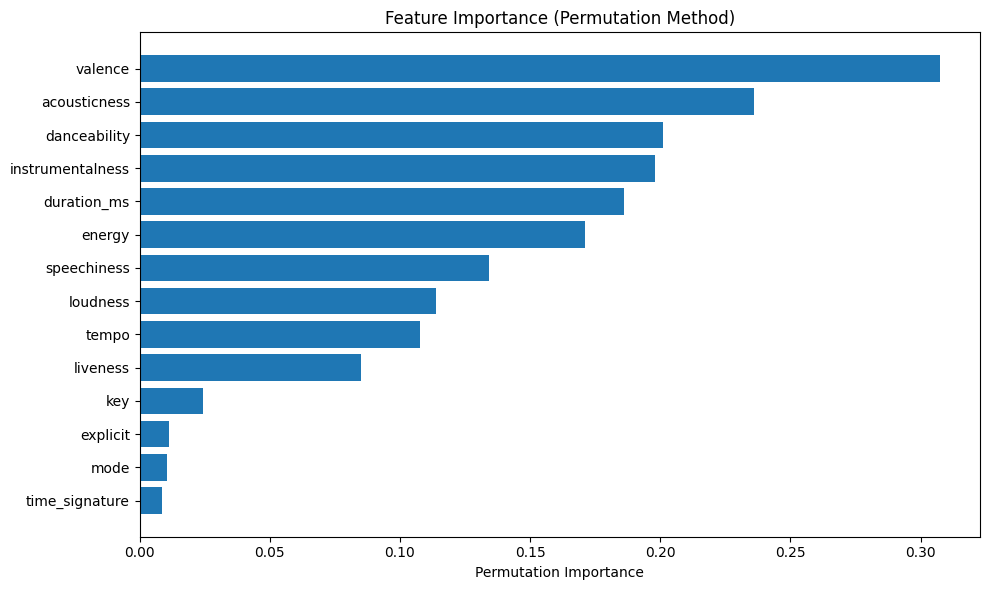

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance_mean'])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Permutation Method)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Random Forest model

Model has built from top features. These Top features has selected by Feature importance through permutation method

In [ ]:
top_features = [
    'valence', 'acousticness', 'danceability', 'instrumentalness',
    'duration_ms', 'energy', 'speechiness', 'loudness', 'tempo', 'liveness'
]

X = df[top_features]
y = df['popularity']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_top.predict(X_test)

print("📊 Random Forest Results (Raw Popularity)")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))

📊 Random Forest Results (Raw Popularity)
R² Score : 0.5245
MAE      : 10.9837
MSE      : 235.7971


In [ ]:
import joblib
joblib.dump(rf_top, '/content/drive/MyDrive/Audio_Genre_ML/rf_top_features_model.pkl')


['/content/drive/MyDrive/Audio_Genre_ML/rf_top_features_model.pkl']

In [ ]:
import joblib

In [ ]:
rf_top= joblib.load('/content/drive/MyDrive/Audio_Genre_ML/rf_top_features_model.pkl')

In [ ]:
df_top_features = df[top_features + ['popularity']]

In [ ]:
df_top_features.to_pickle('/content/drive/MyDrive/Audio_Genre_ML/df_top_features.pkl')


In [ ]:
import joblib
df= joblib.load('/content/drive/MyDrive/Audio_Genre_ML/df_top_features.pkl')

In [ ]:
df.head()

,valence,acousticness,danceability,instrumentalness,duration_ms,energy,speechiness,loudness,tempo,liveness,popularity
0,0.715,0.0322,0.676,0.000001,230666,0.4610,0.1430,-6.746,87.917,0.3580,73
1,0.267,0.9240,0.420,0.000006,149610,0.1660,0.0763,-17.235,77.489,0.1010,55
2,0.120,0.2100,0.438,0.000000,210826,0.3590,0.0557,-9.734,76.332,0.1170,57
3,0.143,0.9050,0.266,0.000071,201933,0.0596,0.0363,-18.515,181.740,0.1320,71
4,0.167,0.4690,0.618,0.000000,198853,0.4430,0.0526,-9.681,119.949,0.0829,82


## SHAP with a Small, Temporary Model

Which make us understand the general feature influence

In [ ]:
X = df.drop(columns=['popularity'])
y= df['popularity']

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import shap

# Step 1: Smaller model for SHAP
rf_small = RandomForestRegressor(n_estimators=20, max_depth=6, random_state=42)
rf_small.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=20, random_state=42)

In [ ]:
# Step 2: Take a small test sample
X_sample = X_test.sample(100, random_state=42)

In [ ]:
# Step 3: SHAP analysis (TreeExplainer)
explainer = shap.TreeExplainer(rf_small)
shap_values = explainer.shap_values(X_sample)

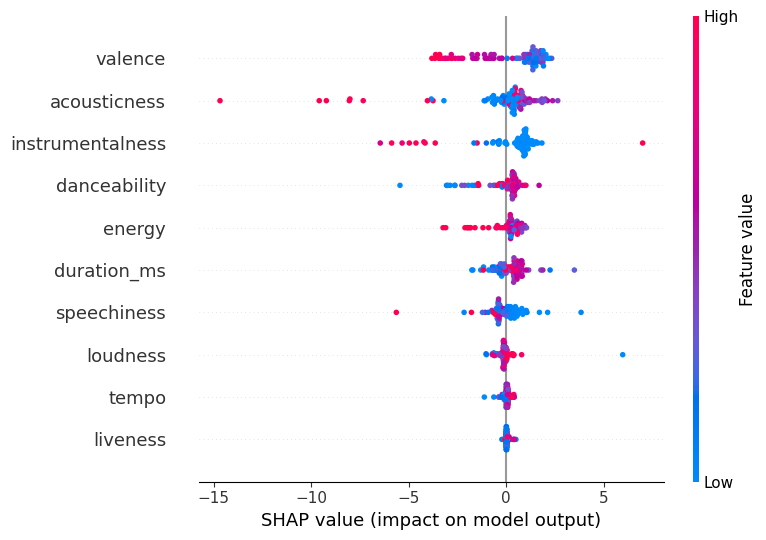

In [ ]:
# Step 4: Summary plot
shap.summary_plot(shap_values, X_sample)

## SHAP Insights (Confirmed)

✅ 1. Valence — Strong Positive Influence

High valence = "happier" songs

Strongly increases predicted popularity (pushed SHAP values +2 to +3)

Keep this as a core feature 💡

✅ 2. Acousticness — Strong Negative Influence

High acousticness (more acoustic instruments) = lower predicted popularity

SHAP shows values around -12 to -15 — very strong influence

This feature is crucial — it defines a major popularity signal

✅ 3. Instrumentalness — Moderate Negative
Tracks with more instruments but fewer vocals trend less popular

Suggests vocals are important for listener appeal in our dataset

In [1]:
# Load the data
import pandas as pd
df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [2]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


## Popularity Prediction with cluster added feature

In [ ]:
popularity_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature', 'cluster'  # add cluster
]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Feature matrix and target
X = df[popularity_features]
y = df['popularity']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Feature matrix and target
X = df[popularity_features]
y = df['popularity']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📊 Random Forest Results (With Cluster)")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Random Forest Results (With Cluster)
R² Score : 0.5539
MAE      : 10.54
MSE      : 221.3255


## Final model for production

In [ ]:
import joblib

joblib.dump(model,"/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_cluster.pkl")

['/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_cluster.pkl']

In [ ]:
import joblib

model = joblib.load("/content/drive/MyDrive/Audio_Genre_ML/rf_popularity_cluster.pkl")

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,  # 3-fold cross-validation
    scoring='r2',  # Or use neg_root_mean_squared_error, etc.
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Evaluate on test set
y_pred_best = best_model.predict(X_test)

# Metrics
print("📊 Tuned Random Forest Results")
print("Best Params :", random_search.best_params_)
print("R² Score    :", round(r2_score(y_test, y_pred_best), 4))
print("MAE         :", round(mean_absolute_error(y_test, y_pred_best), 4))
print("MSE         :", round(mean_squared_error(y_test, y_pred_best), 4))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
54 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

📊 Tuned Random Forest Results
Best Params : {'max_depth': 26, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
R² Score    : 0.4779
MAE         : 12.4303
MSE         : 259.0044


## Cross-Validation on Both Models

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score_default = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()
cv_score_tuned = cross_val_score(best_model, X_scaled, y, cv=5, scoring='r2').mean()

print("Cross-Validated R² (Default):", round(cv_score_default, 4))
print("Cross-Validated R² (Tuned)  :", round(cv_score_tuned, 4))


Cross-Validated R² (Default): 0.3539
Cross-Validated R² (Tuned)  : 0.0662


## SHAP Analysis

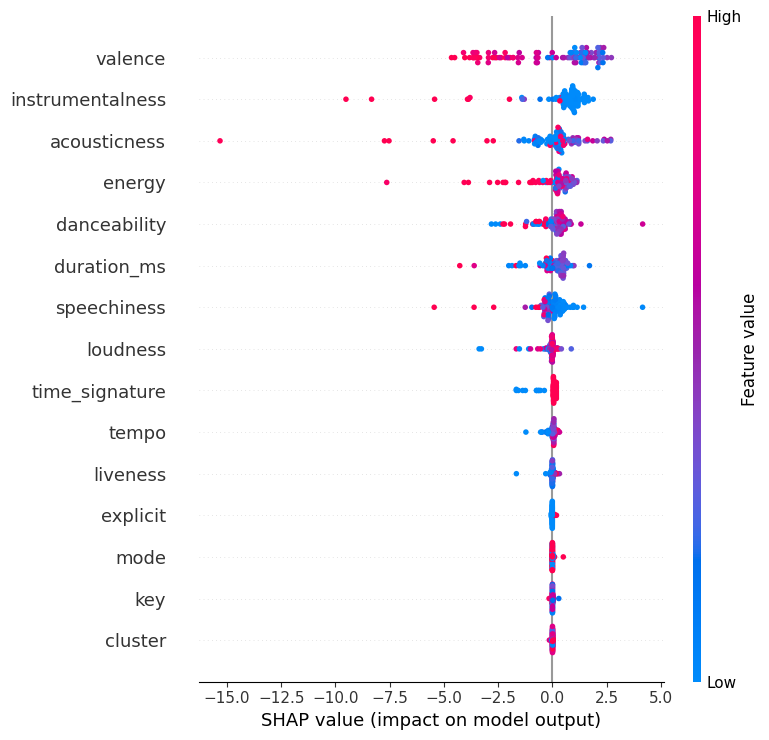

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Feature matrix and target
X = df[popularity_features]
y = df['popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import shap

# Step 1: Smaller model for SHAP
rf_small = RandomForestRegressor(n_estimators=20, max_depth=6, random_state=42)
rf_small.fit(X_train_scaled, y_train)

# Step 2: Take a small test sample from the *scaled* data
# X_test_scaled is a numpy array, convert to DataFrame to use sample()
X_sample = pd.DataFrame(X_test_scaled, columns=X_test.columns).sample(100, random_state=42)


# Step 3: SHAP analysis (TreeExplainer)
explainer = shap.TreeExplainer(rf_small)
shap_values = explainer.shap_values(X_sample)

# Step 4: Summary plot
shap.summary_plot(shap_values, X_sample)

# Random Forest Model Insights for Music Popularity Prediction

Model Performance Analysis

Based on the SHAP values plot, this Random Forest model demonstrates clear feature importance patterns for predicting music popularity. The analysis reveals which audio characteristics most strongly influence a track's predicted popularity.

Feature Importance Rankings

High Impact Features (Primary Drivers)

1. Valence (Highest Impact)

Shows the widest SHAP value distribution (-2.5 to +4.0)
Key Insight: Higher valence (more positive/happy songs) strongly correlates with increased popularity
Red dots (high valence) consistently appear on the positive side, indicating happy songs are predicted to be more popular

2. Instrumentalness (Second Highest)

Significant negative correlation with popularity
Key Insight: Songs with vocals (low instrumentalness) are much more likely to be popular than instrumental tracks
High instrumentalness values (red dots) cluster on the negative SHAP side

3. Acousticness (Third Highest)

Strong negative correlation pattern
Key Insight: More acoustic songs tend to have lower predicted popularity
Electronic/produced songs (low acousticness) are favored for popularity

Moderate Impact Features

4. Energy

Moderate positive correlation
Higher energy songs show slight tendency toward increased popularity

5. Danceability

Moderate positive influence
More danceable tracks have slight positive impact on popularity predictions

6. Duration (duration_ms)

Moderate impact with mixed patterns
Suggests optimal song length exists for popularity

Low Impact Features (Minimal Influence)
The following features show minimal impact on popularity predictions:

Speechiness: Very tight distribution around zero
Loudness: Limited influence
Time Signature: Nearly no impact
Tempo: Minimal effect
Liveness: Very low impact
Explicit Content: No significant influence
Mode: Negligible impact
Key: No meaningful contribution
Cluster: Minimal impact

# Business Implications

For Music Producers/Artists:

Prioritize Positive Emotions: Songs with higher valence (happiness, positivity) have significantly better popularity prospects
Include Vocals: Instrumental tracks face substantial popularity disadvantages
Consider Production Style: Less acoustic, more produced sounds tend to perform better
Energy Matters: Higher energy levels provide moderate popularity boosts

For Music Streaming Platforms:

Recommendation Algorithm: Focus on valence, instrumentalness, and acousticness as primary features
Playlist Curation: Emphasize upbeat, vocal-driven, produced tracks
Discovery Features: Technical aspects like key and mode are less relevant for popularity-based recommendations

## Model Characteristics

Strengths:

Clear feature hierarchy with strong signal from top 3 features
Robust discrimination between high and low impact features
Consistent patterns across feature values

Limitations:

Heavy reliance on few features (potential overfitting risk)
Many audio features contribute minimally to predictions
May miss nuanced genre-specific popularity patterns

## Feature Importance

/tmp/ipython-input-6-1947011746.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
/tmp/ipython-input-6-1947011746.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


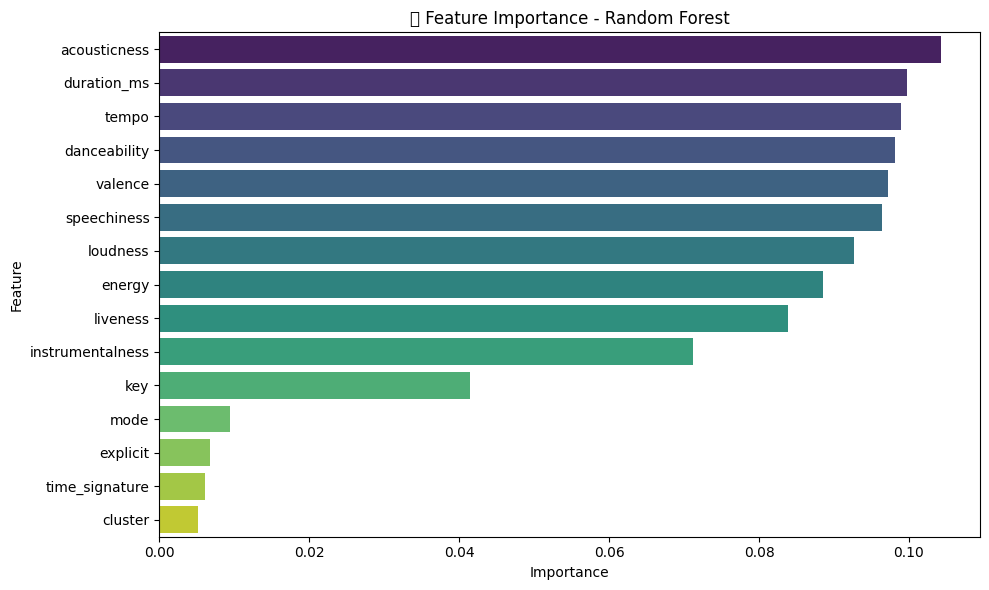

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance from Random Forest
importances = model.feature_importances_
feature_names = popularity_features

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("🔍 Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


## Boxplot of Popularity by Cluster

/tmp/ipython-input-5-2537650511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')


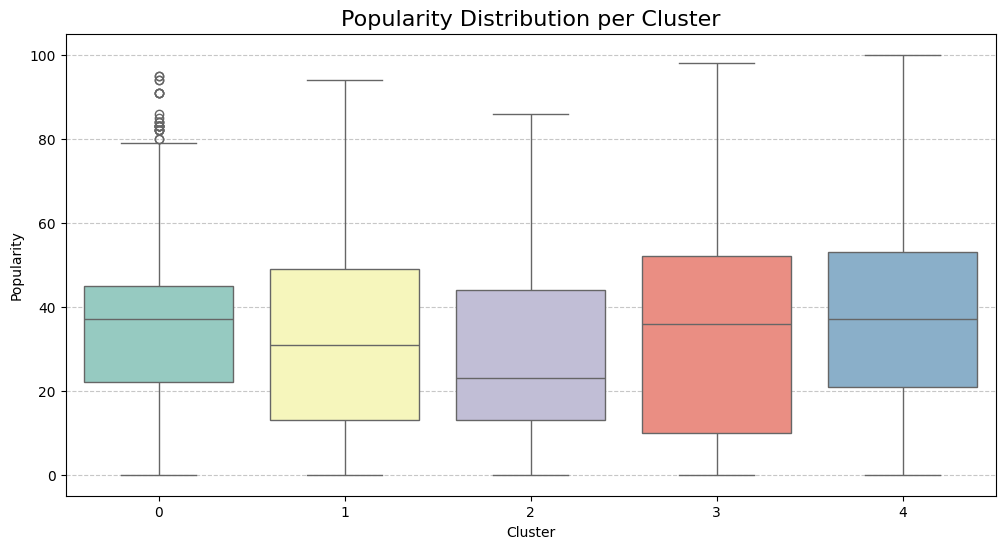

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')
plt.title('Popularity Distribution per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Insights:


Clusters 0, 3, and 4 have similar median popularity (~37-38) but different distribution patterns
Cluster 2 appears to represent the most niche/underground genre
Cluster 1 shows the most commercial variability, possibly representing a diverse genre like "pop" that includes both mainstream hits and lesser-known tracks
The clustering algorithm has successfully separated music into groups with distinct commercial patterns

In [3]:
super_genres = {
    'rock': ['rock', 'rock-n-roll', 'punk', 'punk-rock', 'grunge', 'psych-rock', 'hard-rock'],
    'pop': ['pop', 'indie-pop', 'synth-pop', 'pop-film', 'power-pop'],
    'electronic': ['electronic', 'edm', 'electro', 'techno', 'trance', 'dubstep', 'house', 'deep-house', 'minimal-techno'],
    'metal': ['metal', 'heavy-metal', 'death-metal', 'black-metal', 'metalcore', 'grindcore'],
    'hiphop': ['hip-hop', 'rap', 'r-n-b'],
    'japanese': ['j-pop', 'j-rock', 'j-dance', 'j-idol'],
    'latin': ['reggaeton', 'reggae', 'salsa', 'brazil', 'latino', 'samba', 'mpb', 'pagode'],
    'classical': ['classical', 'piano', 'opera', 'new-age'],
    'country': ['country', 'honky-tonk'],
    'folk': ['folk', 'acoustic', 'bluegrass'],
    'ambient': ['ambient', 'study', 'sleep', 'chill'],
    'world': ['indian', 'turkish', 'iranian', 'mandopop', 'cantopop', 'malay', 'world-music'],
    'children': ['children', 'disney', 'kids'],
    'other': ['gospel', 'funk', 'jazz', 'blues', 'soul', 'show-tunes', 'comedy']
}

In [4]:
def map_super_genre(genre):
    for super_genre, sub_genres in super_genres.items():
        if genre in sub_genres:
            return super_genre
    return 'misc'

df['super_genre'] = df['track_genre'].apply(map_super_genre)

## Encode categorical features

In [5]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['track_genre_encoded'] = LabelEncoder().fit_transform(df_encoded['track_genre'])
df_encoded['super_genre_encoded'] = LabelEncoder().fit_transform(df_encoded['super_genre'])


## Update feature list

In [8]:
popularity_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature', 'cluster',
    'track_genre_encoded', 'super_genre_encoded'
]


## Train Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare data
X = df_encoded[popularity_features]
y = df_encoded['popularity']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📊 Random Forest Results (With Cluster + Genre + Super Genre)")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("MAE      :", round(mean_absolute_error(y_test, y_pred), 4))
print("MSE      :", round(mean_squared_error(y_test, y_pred), 4))


📊 Random Forest Results (With Cluster + Genre + Super Genre)
R² Score : 0.4993
MAE      : 10.7513
MSE      : 248.4148
